PCA - Clustering\
Nhóm 9:\
23122018 Lại Nguyễn Hồng Thanh\
23122019 Phan Huỳnh Châu Thịnh\
23122029 Nguyễn Trọng Hòa\
23122047 Nguyễn Xuân Quang

# Cài đặt các thư viện

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import eig
import seaborn as sns

from sklearn.preprocessing import StandardScaler  #Kiểm thử
from sklearn.decomposition import PCA #Kiểm thử

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist #Tính khoảng cách giữa các cặp điểm trong hai tập hợp

import warnings
warnings.filterwarnings('ignore')

# Phần 1: PCA

## Dữ liệu

### Tải tập dữ liệu

In [81]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

### In ra số dòng, tên các cột

In [82]:
print("[Thông tin dataset Iris]")
print("Số dòng:", X.shape[0])
print("Số cột:", X.shape[1])
print("Tên các cột:", iris.feature_names)


[Thông tin dataset Iris]
Số dòng: 150
Số cột: 4
Tên các cột: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Class MyPCA

In [83]:
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.std = None
        self.components = None
        self.EVR = None
        self.CEVR = None

    def fit(self, X):
        #Tính mean và std của từng feature
        self.mean = np.mean(X, axis = 0)
        self.std = np.std(X, axis = 0)

        #Chuẩn hóa dữ liệu (z-score normalization)
        X_std = (X - self.mean) / self.std

        #Tính ma trận hiệp phương sai
        cov_matrix = np.cov(X_std, rowvar = False)

        #Phân rã giá trị riêng
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        #Sắp xếp eigenvalues và eigenvectors theo thứ tự giảm dần
        sorted_index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_index]
        eigenvectors = eigenvectors[:, sorted_index]

        #Lưu các thành phần chính
        self.components = eigenvectors[:, :self.n_components]

        #Tính EVR và CEVR
        total_variance = np.sum(eigenvalues)
        self.EVR = eigenvalues[:self.n_components] / total_variance
        self.CEVR = np.cumsum(self.EVR)

    def transform(self, X):
        #Dựng dữ liệu mới trong không gian PCA
        X = (X - self.mean) / self.std
        return np.dot(X, self.components)

## PCA dữ liệu iris
- PCA dữ liệu
- In ra số thành phần sau khi PCA
- In ra EVR, CEVR
- Chuyển đổi X

In [84]:
my_pca = MyPCA(n_components=2)
my_pca.fit(X)
X_my_pca = my_pca.transform(X)

#In kết quả từ MyPCA
print("\n[MyPCA]")
print("Số thành phần sau PCA:", my_pca.components.shape[1])
print("EVR:", my_pca.EVR)
print("CEVR:", my_pca.CEVR)
print("Dữ liệu X sau PCA (5 dòng đầu):\n", X_my_pca[:5])


[MyPCA]
Số thành phần sau PCA: 2
EVR: [0.72962445 0.22850762]
CEVR: [0.72962445 0.95813207]
Dữ liệu X sau PCA (5 dòng đầu):
 [[ 2.26470281  0.4800266 ]
 [ 2.08096115 -0.67413356]
 [ 2.36422905 -0.34190802]
 [ 2.29938422 -0.59739451]
 [ 2.38984217  0.64683538]]


## Kiểm lại với Scikit-Learn

In [85]:
# Chuẩn hóa dữ liệu trước khi dùng sklearn PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sklearn_pca = PCA(n_components=2)
X_sklearn_pca = sklearn_pca.fit_transform(X_scaled)

# In kết quả từ sklearn PCA
print("\n[Scikit-Learn PCA]")
print("Số thành phần sau PCA:", sklearn_pca.n_components_)
print("EVR:", sklearn_pca.explained_variance_ratio_)
print("CEVR:", np.cumsum(sklearn_pca.explained_variance_ratio_))
print("Dữ liệu X sau PCA (5 dòng đầu):\n", X_sklearn_pca[:5])


[Scikit-Learn PCA]
Số thành phần sau PCA: 2
EVR: [0.72962445 0.22850762]
CEVR: [0.72962445 0.95813207]
Dữ liệu X sau PCA (5 dòng đầu):
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


# Phần 2: Clustering

## Dữ liệu

### Tải dữ liệu
Dữ liệu được tải từ link Google Sheets [ABIDE2.csv](https://docs.google.com/spreadsheets/d/1KVK8XmyJSBW84IGeXH7p-q1PrmiiikVfWW3RRmm1Kfc/export?format=csv)

In [86]:
def download_drive_csv(file_id, filename='data.csv'):
    url = f"https://drive.google.com/uc?id={file_id}"

    try:
        df = pd.read_csv(url)
        print(f"Đã tải và đọc thành công file CSV từ Google Drive. Kích thước: {df.shape}")
        return df
    except Exception as e:
        print("Lỗi khi tải file:", e)
        return None

In [87]:
file_id = "14KDawKni1yc9ubJuLxs9JAfcvBO2__UT"
df = download_drive_csv(file_id)
df = df.drop(columns = ["Unnamed: 0"])

Đã tải và đọc thành công file CSV từ Google Drive. Kích thước: (1004, 1445)


### Đọc thông tin dữ liệu
 + In ra số dòng, số cột, số mẫu Cancer, Normal của **group**
 + So sánh với dữ liệu được cung cấp:
- Số dòng: 1004
- Số cột: 1444
- Số Cancer: 463
- Số Normal: 541

In [88]:
# In thông tin tổng quát
print("Tổng số dòng:", df.shape[0])
print("Tổng số cột:", df.shape[1])

# Thống kê số mẫu theo nhãn 'group'
group_counts = df['group'].value_counts()
print("\nSố mẫu theo nhãn 'group':")
print(group_counts)

# So sánh với mô tả trong đề bài
expected_rows = 1004
expected_columns = 1444
expected_cancer = 463
expected_normal = 541

print("\n So sánh với mô tả trong đề:")
print(f"- Số dòng: {df.shape[0] == expected_rows}")
print(f"- Số cột: {df.shape[1] == expected_columns}")
print(f"- Số mẫu 'Cancer': {group_counts.get('Cancer', 0) == expected_cancer}")
print(f"- Số mẫu 'Normal': {group_counts.get('Normal', 0) == expected_normal}")

Tổng số dòng: 1004
Tổng số cột: 1444

Số mẫu theo nhãn 'group':
group
Normal    541
Cancer    463
Name: count, dtype: int64

 So sánh với mô tả trong đề:
- Số dòng: True
- Số cột: True
- Số mẫu 'Cancer': True
- Số mẫu 'Normal': True


=> Dữ liệu khớp với dữ liệu được cung cấp (dư 1 cột do tính cả reindex)

In [89]:
df

,site,subject,age,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,Cancer,2750.0,306.0,354.0,2123.0,1451.0,1128.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,Cancer,2836.0,186.0,354.0,2261.0,1584.0,1241.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,Normal,3394.0,223.0,373.0,2827.0,1816.0,1299.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,Cancer,3382.0,266.0,422.0,2686.0,1893.0,1359.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,Normal,3080.0,161.0,346.0,2105.0,1307.0,1004.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ABIDEII-IU_1,29570,20.000000,Normal,3321.0,290.0,381.0,2802.0,1827.0,1314.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,ABIDEII-NYU_1,29233,10.862000,Normal,2860.0,162.0,456.0,2460.0,1718.0,1225.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,ABIDEII-SDSU_1,28862,11.200000,Normal,3377.0,177.0,497.0,2810.0,1866.0,1343.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,ABIDEII-KKI_1,29312,9.789041,Normal,3322.0,297.0,426.0,2640.0,1726.0,1242.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Columns: 1444 entries, site to fsCT_R_p24_ROI
dtypes: float64(1441), int64(1), object(2)
memory usage: 11.1+ MB


In [91]:
df.describe()

,subject,age,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,29278.616534,15.101264,3161.415339,226.266932,395.445219,2613.914343,1747.64741,1298.107570,262.410359,1811.776892,...,2.543007,3.256986,2.677017,2.721997,3.173171,2.809079,3.051686,2.691974,2.867733,3.200925
std,374.424343,9.433702,495.962723,68.517782,67.150610,343.635256,235.02218,205.374357,58.737676,247.112768,...,0.346484,0.470978,0.317000,0.337975,0.323499,0.330795,0.375022,0.322569,0.351564,0.394258
min,28675.000000,5.128000,1423.000000,80.000000,166.000000,981.000000,791.00000,592.000000,98.000000,936.000000,...,1.633000,1.682000,1.563000,1.652000,1.935000,1.399000,1.599000,1.647000,1.790000,1.138000
25%,28974.750000,9.280137,2846.750000,172.000000,352.000000,2433.000000,1603.00000,1170.750000,225.000000,1649.000000,...,2.309750,3.004000,2.487500,2.507000,2.987750,2.601250,2.835750,2.490000,2.640000,2.957500
50%,29247.500000,11.667580,3136.500000,225.000000,396.500000,2619.000000,1746.50000,1295.000000,263.000000,1798.000000,...,2.525500,3.357500,2.693500,2.724000,3.206000,2.852500,3.085500,2.709000,2.883500,3.221000
75%,29542.250000,18.015000,3454.250000,275.000000,438.250000,2822.000000,1900.25000,1439.000000,303.000000,1955.000000,...,2.784500,3.594250,2.883000,2.953250,3.389250,3.027250,3.313000,2.895000,3.097500,3.458000
max,30167.000000,64.000000,4740.000000,494.000000,641.000000,3588.000000,2477.00000,2024.000000,534.000000,3221.000000,...,3.448000,4.219000,3.735000,3.795000,4.136000,3.630000,4.083000,3.990000,3.961000,4.328000


### Xử lý dữ liệu thiếu

#### *Kiểm tra dữ liệu thiếu*

In [92]:
#Kiểm tra dữ liệu bị thiếu
miss_vals = df.isnull().sum()
miss_vals = miss_vals[miss_vals > 0]

print("Số lượng dữ liệu bị thiếu: ")
print(miss_vals)

Số lượng dữ liệu bị thiếu: 
Series([], dtype: int64)


=> Không có dữ liệu nào bị thiếu

### Xử lý dữ liệu trùng lặp

In [93]:
num_dupl = df.duplicated().sum()
print(f"Số dòng bị trùng lặp hoàn toàn: {num_dupl}")

Số dòng bị trùng lặp hoàn toàn: 0


### Xóa các cột không liên quan đến vùng não

In [94]:
non_feature_cols = ['site', 'subject', 'age', 'group']
df = df.drop(columns = ['site', 'subject', 'age'])
features = df.columns

In [95]:
df

,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,Cancer,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,Cancer,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,Normal,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,Cancer,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,Normal,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Normal,3321.0,290.0,381.0,2802.0,1827.0,1314.0,184.0,1992.0,1668.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,Normal,2860.0,162.0,456.0,2460.0,1718.0,1225.0,240.0,2459.0,1721.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,Normal,3377.0,177.0,497.0,2810.0,1866.0,1343.0,254.0,1758.0,1318.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,Normal,3322.0,297.0,426.0,2640.0,1726.0,1242.0,318.0,1719.0,1310.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


### Mã hóa dữ liệu:
- group: chuyển thành nhị phân:
  + Cancer: 1
  + Normal: 0

In [96]:
object_cols = df.select_dtypes(include=['object']).columns
print("Các cột có kiểu object:")
print(object_cols.tolist())

Các cột có kiểu object:
['group']


In [97]:
# Mã hóa group
df['group'] = df['group'].map({'Normal': 0, 'Cancer': 1})

### Feature engineering

#### Tách các nhóm đặc trưng hình thái não
Dữ liệu được tách thành 4 nhóm đặc trưng hình thái học (fsArea, fsVol, fsLGI, fsCT), ứng với 360 vùng não (Regions of Interest - ROIs)

In [98]:
fsArea_cols = [col for col in df if col.startswith('fsArea')]
fsVol_cols = [col for col in features if col.startswith('fsVol')]
fsLGI_cols = [col for col in features if col.startswith('fsLGI')]
fsCT_cols = [col for col in features if col.startswith('fsCT')]

####**Xem xét sự tương quan giữa các loại đo lường**

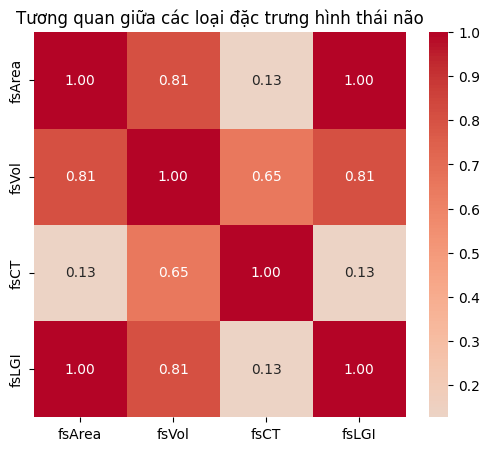

In [99]:
df_summary = pd.DataFrame({
    'fsArea': df[fsArea_cols].mean(axis=1),
    'fsVol': df[fsVol_cols].mean(axis=1),
    'fsCT': df[fsCT_cols].mean(axis=1),
    'fsLGI': df[fsLGI_cols].mean(axis=1)
})

# Tính ma trận tương quan giữa 4 loại đặc trưng
corr_matrix = df_summary.corr(method='pearson')

# Vẽ heatmap tương quan
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Tương quan giữa các loại đặc trưng hình thái não')
plt.show()

=> fsLGI tương quan gần như tuyệt đối vào fsArea

In [100]:
roi_cols = [col for col in df.columns if col.endswith('_ROI')]
print("Tổng số cột ROI:", len(roi_cols))

Tổng số cột ROI: 1440


In [101]:
def engineer_features(df, selected_features=None, non_feature_cols=None):
    if non_feature_cols is None:
        non_feature_cols = ['', 'site', 'subject', 'age', 'group']

    df_engineered = df.copy()

    roi_groups = {
        'visual': ['V1', 'V2', 'V3', 'V4', 'V8', 'MT', 'LO1', 'LO2', 'LO3', 'FFC', 'VVC'],
        'auditory': ['A1', 'A4', 'A5', 'MBelt', 'LBelt', 'PBelt', 'RI'],
        'motor': ['4', '6d', '6mp', '6v', 'FEF', 'PEF', '55b', '6a', '6ma', '6r'],
        'somatosensory': ['1', '2', '3a', '3b', 'OP1', 'OP2-3', 'OP4', '43', 'FOP1', 'FOP2', 'FOP3'],
        'prefrontal': ['8BL', '8C', '8Ad', '8Av', '9a', '9m', '9p', '10d', '10v', '10pp', '10r', '46', '47l']
    }

    # 1. TẠO TRỰC TIẾP CÁC TỶ LỆ L/R CHO TỪNG ROI RIÊNG LẺ
    for measure in ['fsArea', 'fsVol', 'fsLGI', 'fsCT']:
        # Tìm tất cả các cột bên trái (L)
        left_cols = [col for col in df.columns
                    if col.startswith(f"{measure}_L_") and col.endswith("_ROI")]

        for left_col in left_cols:
            # Tìm cột tương ứng bên phải
            right_col = left_col.replace(f"{measure}_L_", f"{measure}_R_")

            # Kiểm tra cột bên phải có tồn tại
            if right_col in df.columns:
                region = left_col.split('_')[2]  # Lấy tên vùng (V1, MT, etc.)
                ratio_col = f"{measure}_LR_Ratio_{region}"

                # Tính tỷ lệ, xử lý chia cho 0
                df_engineered[ratio_col] = df[left_col] / df[right_col].replace(0, np.nan)

                # Xử lý giá trị NA hoặc inf
                df_engineered[ratio_col] = df_engineered[ratio_col].replace([np.inf, -np.inf], np.nan)
                df_engineered[ratio_col] = df_engineered[ratio_col].fillna(df_engineered[ratio_col].median())

    # 2. THÊM MỘT SỐ ĐẶC TRƯNG NHÓM CHỌN LỌC
    important_groups = ['visual', 'motor', 'prefrontal']

    for measure in ['fsArea', 'fsVol', 'fsCT']:
        for group_name in important_groups:
            rois = roi_groups[group_name]

            # Tạo các cột cho bán cầu trái và phải
            for hem in ['L', 'R']:
                group_cols = []
                for roi in rois:
                    col_name = f"{measure}_{hem}_{roi}_ROI"
                    if col_name in df.columns:
                        group_cols.append(col_name)

                if group_cols:
                    # Chỉ tạo đặc trưng trung bình cho nhóm
                    df_engineered[f"{measure}_{hem}_{group_name}_avg"] = df_engineered[group_cols].mean(axis=1)

            # Tính tỷ lệ L/R cho nhóm
            left_col = f"{measure}_L_{group_name}_avg"
            right_col = f"{measure}_R_{group_name}_avg"
            if left_col in df_engineered.columns and right_col in df_engineered.columns:
                ratio_col = f"{measure}_{group_name}_LR_ratio"
                df_engineered[ratio_col] = df_engineered[left_col] / df_engineered[right_col]

                # Xử lý giá trị NA hoặc inf
                df_engineered[ratio_col] = df_engineered[ratio_col].replace([np.inf, -np.inf], np.nan)
                df_engineered[ratio_col] = df_engineered[ratio_col].fillna(df_engineered[ratio_col].median())

    # 3. BỎ HẦU HẾT CÁC TỶ LỆ PHỨC TẠP
    # Chỉ giữ lại 2 cặp quan trọng nhất cho tỷ lệ giữa các chức năng não
    important_function_pairs = [
        ('visual', 'motor'),
        ('prefrontal', 'motor')
    ]

    for measure in ['fsArea', 'fsVol']:  # Chỉ sử dụng 2 loại đo lường
        for hem in ['L']:  # Chỉ sử dụng bán cầu trái
            for region1, region2 in important_function_pairs:
                col1 = f"{measure}_{hem}_{region1}_avg"
                col2 = f"{measure}_{hem}_{region2}_avg"
                if col1 in df_engineered.columns and col2 in df_engineered.columns:
                    ratio_col = f"{measure}_{hem}_{region1}_{region2}_ratio"
                    df_engineered[ratio_col] = df_engineered[col1] / df_engineered[col2]

                    # Xử lý giá trị NA hoặc inf
                    df_engineered[ratio_col] = df_engineered[ratio_col].replace([np.inf, -np.inf], np.nan)
                    df_engineered[ratio_col] = df_engineered[ratio_col].fillna(df_engineered[ratio_col].median())

    # 4. TẠO MỘT SỐ ĐẶC TRƯNG PHI TUYẾN
    # Bỏ hầu hết các biến đổi logarithmic, chỉ áp dụng cho các tỷ lệ L/R
    ratio_cols = [col for col in df_engineered.columns if 'ratio' in col.lower()]
    for col in ratio_cols:
        if df_engineered[col].min() > 0:  # Chỉ áp dụng log cho giá trị dương
            df_engineered[f"{col}_log"] = np.log(df_engineered[col])

    # 5. Xử lý outliers trên tất cả các đặc trưng đã tạo
    # Giới hạn giá trị trong khoảng ±3 độ lệch chuẩn
    for col in df_engineered.columns:
        if col not in non_feature_cols and df_engineered[col].dtype.kind in 'if':  # Số nguyên hoặc float
            mean = df_engineered[col].mean()
            std = df_engineered[col].std()
            if std > 0:  # Tránh trường hợp std = 0
                lower_bound = mean - 3 * std
                upper_bound = mean + 3 * std
                df_engineered[col] = df_engineered[col].clip(lower_bound, upper_bound)

    return df_engineered

In [102]:
df1 = engineer_features(df, features, non_feature_cols)
df1

,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,...,fsVol_visual_LR_ratio_log,fsVol_motor_LR_ratio_log,fsVol_prefrontal_LR_ratio_log,fsCT_visual_LR_ratio_log,fsCT_motor_LR_ratio_log,fsCT_prefrontal_LR_ratio_log,fsArea_L_visual_motor_ratio_log,fsArea_L_prefrontal_motor_ratio_log,fsVol_L_visual_motor_ratio_log,fsVol_L_prefrontal_motor_ratio_log
0,1,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,...,-0.022338,-0.176461,-0.074815,-0.016924,-0.003477,-0.028904,0.382886,-0.045379,0.243541,0.123619
1,1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,...,-0.050837,-0.070147,-0.017267,-0.017012,0.016706,0.003581,0.591441,0.015104,0.367684,0.161889
2,0,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,...,0.025659,-0.056736,0.025483,0.060729,0.001896,0.028285,0.474711,0.142389,0.244987,0.259027
3,1,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,...,-0.090697,0.070453,0.003985,0.016863,0.075821,0.095313,0.433762,-0.055025,0.247114,0.163432
4,0,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,...,-0.069827,0.039977,0.000589,0.075044,0.095360,0.069440,0.560949,0.015607,0.384428,0.090360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0,3321.0,290.0,381.0,2802.0,1827.0,1314.0,184.0,1992.0,1668.0,...,-0.042648,0.097257,-0.119218,0.041730,0.013393,0.063143,0.371005,-0.220433,0.086199,-0.096808
1000,0,2860.0,162.0,456.0,2460.0,1718.0,1225.0,240.0,2459.0,1721.0,...,-0.146676,0.037877,-0.011660,-0.018467,0.037134,0.010459,0.106799,-0.272373,-0.125932,-0.177787
1001,0,3377.0,177.0,497.0,2810.0,1866.0,1343.0,254.0,1758.0,1318.0,...,0.061586,0.037112,-0.094120,0.006655,-0.026921,-0.040138,0.511901,-0.138064,0.261077,0.061678
1002,0,3322.0,297.0,426.0,2640.0,1726.0,1242.0,318.0,1719.0,1310.0,...,0.068666,-0.097641,-0.002129,0.052854,0.000248,-0.044995,0.584997,0.112015,0.406156,0.186671


### Giảm chiều dữ liệu
Dùng class MyPCA:
PCA cho từng tính chất của data: area_cols, vol_cols, lgi_cols, ct_cols

#### Tách dữ liệu X và Y
- X gồm các cột đặc trưng ngoại trừ cột **group**
- Y = **group**

In [103]:
#X = df1.drop(columns = ['group']).values
X = df1.drop(columns = ['group'])
Y = df['group'].values

In [104]:
X.shape

(1004, 2916)

#### PCA theo từng nhóm

In [105]:
# Xác định các nhóm biến sau khi feature engineering
fsArea_cols = [col for col in X.columns if col.startswith('fsArea_') and 'ratio' not in col]
fsVol_cols = [col for col in X.columns if col.startswith('fsVol_') and 'ratio' not in col]
fsLGI_cols = [col for col in X.columns if col.startswith('fsLGI_') and 'ratio' not in col]
fsCT_cols = [col for col in X.columns if col.startswith('fsCT_') and 'ratio' not in col]
ratio_cols = [col for col in X.columns if 'ratio' in col]

In [106]:
def find_optimal_components(X, group_name, variance_threshold=0.95, max_components=None):
    if max_components is None:
        max_components = min(X.shape[0], X.shape[1])

    # Khởi tạo MyPCA với số lượng thành phần tối đa
    temp_pca = MyPCA(n_components=max_components)
    temp_pca.fit(X)

    # Tìm số lượng thành phần để đạt ngưỡng phương sai
    cum_variance = temp_pca.CEVR
    n_components = np.argmax(cum_variance >= variance_threshold) + 1
    n_components = max(1, min(n_components, max_components))

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o')
    plt.axhline(y=variance_threshold, color='r', linestyle='--')
    plt.xlabel('Số lượng thành phần')
    plt.ylabel('Phương sai tích lũy')
    plt.title(f'Scree Plot - {group_name}')
    plt.show()

    print(f"Nhóm {group_name}: {n_components} thành phần giữ lại {variance_threshold*100}% phương sai")

    return n_components

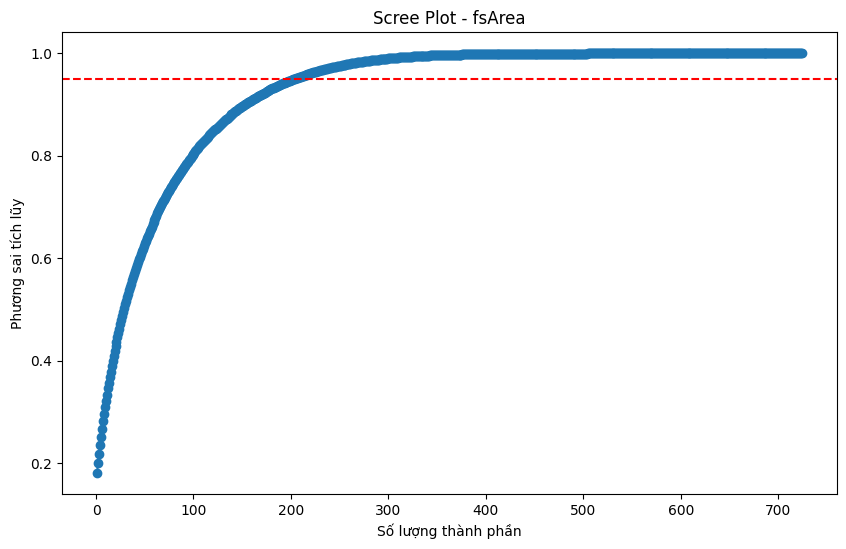

Nhóm fsArea: 204 thành phần giữ lại 95.0% phương sai
fsArea - Phương sai cho mỗi thành phần:
PC1: 0.1807 (0.1807 tích lũy)
PC2: 0.0194 (0.2001 tích lũy)
PC3: 0.0185 (0.2186 tích lũy)
PC4: 0.0171 (0.2357 tích lũy)
PC5: 0.0162 (0.2520 tích lũy)
PC6: 0.0151 (0.2671 tích lũy)
PC7: 0.0147 (0.2818 tích lũy)
PC8: 0.0139 (0.2957 tích lũy)
PC9: 0.0133 (0.3090 tích lũy)
PC10: 0.0128 (0.3219 tích lũy)
PC11: 0.0123 (0.3342 tích lũy)
PC12: 0.0118 (0.3460 tích lũy)
PC13: 0.0115 (0.3575 tích lũy)
PC14: 0.0107 (0.3682 tích lũy)
PC15: 0.0106 (0.3787 tích lũy)
PC16: 0.0104 (0.3891 tích lũy)
PC17: 0.0101 (0.3993 tích lũy)
PC18: 0.0098 (0.4091 tích lũy)
PC19: 0.0096 (0.4187 tích lũy)
PC20: 0.0094 (0.4281 tích lũy)
PC21: 0.0091 (0.4371 tích lũy)
PC22: 0.0087 (0.4459 tích lũy)
PC23: 0.0086 (0.4545 tích lũy)
PC24: 0.0085 (0.4630 tích lũy)
PC25: 0.0083 (0.4713 tích lũy)
PC26: 0.0083 (0.4796 tích lũy)
PC27: 0.0079 (0.4875 tích lũy)
PC28: 0.0077 (0.4952 tích lũy)
PC29: 0.0076 (0.5028 tích lũy)
PC30: 0.0071 (0.5

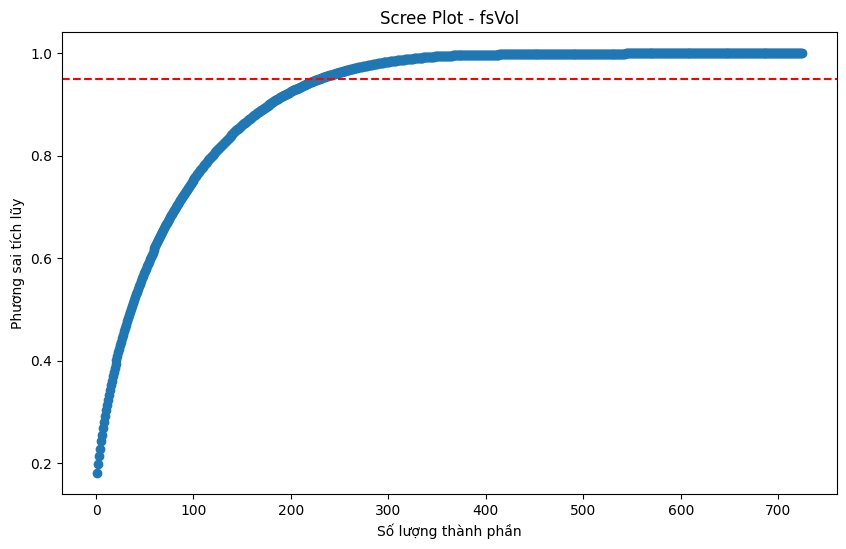

Nhóm fsVol: 230 thành phần giữ lại 95.0% phương sai

fsVol - Phương sai cho mỗi thành phần:
PC1: 0.1805 (0.1805 tích lũy)
PC2: 0.0175 (0.1980 tích lũy)
PC3: 0.0161 (0.2141 tích lũy)
PC4: 0.0146 (0.2287 tích lũy)
PC5: 0.0140 (0.2427 tích lũy)
PC6: 0.0132 (0.2559 tích lũy)
PC7: 0.0128 (0.2687 tích lũy)
PC8: 0.0117 (0.2804 tích lũy)
PC9: 0.0115 (0.2919 tích lũy)
PC10: 0.0112 (0.3032 tích lũy)
PC11: 0.0106 (0.3138 tích lũy)
PC12: 0.0101 (0.3239 tích lũy)
PC13: 0.0098 (0.3338 tích lũy)
PC14: 0.0094 (0.3431 tích lũy)
PC15: 0.0090 (0.3522 tích lũy)
PC16: 0.0088 (0.3610 tích lũy)
PC17: 0.0084 (0.3695 tích lũy)
PC18: 0.0082 (0.3777 tích lũy)
PC19: 0.0080 (0.3857 tích lũy)
PC20: 0.0079 (0.3936 tích lũy)
PC21: 0.0077 (0.4013 tích lũy)
PC22: 0.0076 (0.4089 tích lũy)
PC23: 0.0073 (0.4162 tích lũy)
PC24: 0.0071 (0.4234 tích lũy)
PC25: 0.0070 (0.4304 tích lũy)
PC26: 0.0070 (0.4374 tích lũy)
PC27: 0.0069 (0.4442 tích lũy)
PC28: 0.0068 (0.4510 tích lũy)
PC29: 0.0066 (0.4575 tích lũy)
PC30: 0.0065 (0.46

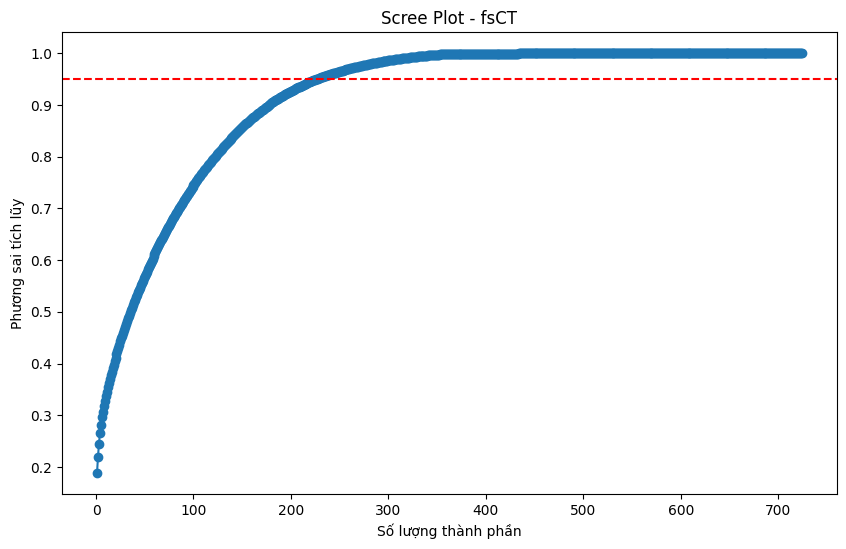

Nhóm fsCT: 227 thành phần giữ lại 95.0% phương sai

fsCT - Phương sai cho mỗi thành phần:
PC1: 0.1879 (0.1879 tích lũy)
PC2: 0.0315 (0.2194 tích lũy)
PC3: 0.0257 (0.2451 tích lũy)
PC4: 0.0198 (0.2649 tích lũy)
PC5: 0.0159 (0.2808 tích lũy)
PC6: 0.0149 (0.2957 tích lũy)
PC7: 0.0115 (0.3072 tích lũy)
PC8: 0.0103 (0.3175 tích lũy)
PC9: 0.0095 (0.3271 tích lũy)
PC10: 0.0093 (0.3364 tích lũy)
PC11: 0.0089 (0.3453 tích lũy)
PC12: 0.0084 (0.3537 tích lũy)
PC13: 0.0082 (0.3619 tích lũy)
PC14: 0.0079 (0.3697 tích lũy)
PC15: 0.0073 (0.3770 tích lũy)
PC16: 0.0070 (0.3841 tích lũy)
PC17: 0.0069 (0.3910 tích lũy)
PC18: 0.0069 (0.3979 tích lũy)
PC19: 0.0068 (0.4047 tích lũy)
PC20: 0.0067 (0.4114 tích lũy)
PC21: 0.0065 (0.4179 tích lũy)
PC22: 0.0064 (0.4243 tích lũy)
PC23: 0.0063 (0.4305 tích lũy)
PC24: 0.0061 (0.4366 tích lũy)
PC25: 0.0060 (0.4426 tích lũy)
PC26: 0.0058 (0.4484 tích lũy)
PC27: 0.0057 (0.4542 tích lũy)
PC28: 0.0057 (0.4599 tích lũy)
PC29: 0.0056 (0.4654 tích lũy)
PC30: 0.0055 (0.4710

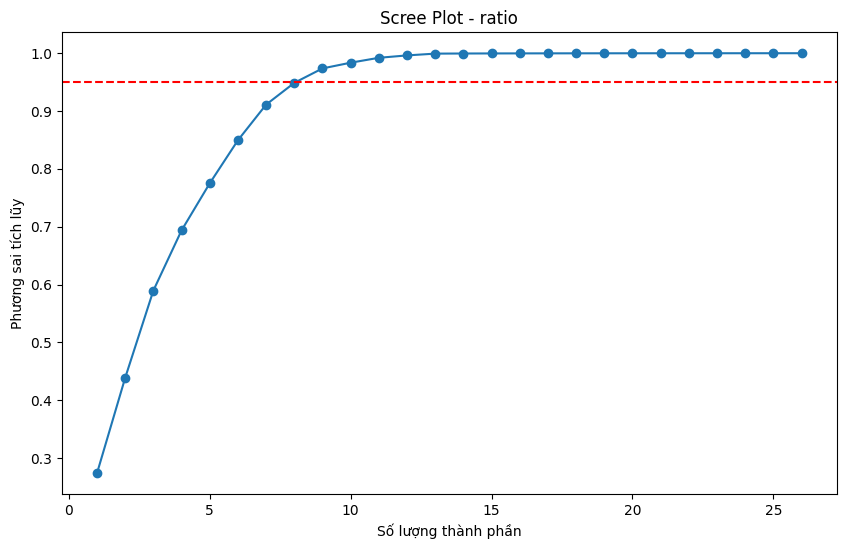

Nhóm ratio: 9 thành phần giữ lại 95.0% phương sai

ratio - Phương sai cho mỗi thành phần:
PC1: 0.2736 (0.2736 tích lũy)
PC2: 0.1650 (0.4386 tích lũy)
PC3: 0.1509 (0.5895 tích lũy)
PC4: 0.1040 (0.6936 tích lũy)
PC5: 0.0814 (0.7750 tích lũy)
PC6: 0.0745 (0.8495 tích lũy)
PC7: 0.0616 (0.9111 tích lũy)
PC8: 0.0377 (0.9487 tích lũy)
PC9: 0.0250 (0.9737 tích lũy)

Kích thước X_pca_combined: (1004, 670)


In [107]:
X_pca_combined = pd.DataFrame()
# Nhóm fsArea
if fsArea_cols:
    X_fsArea = X[fsArea_cols].values
    n_comp_fsArea = find_optimal_components(X_fsArea, "fsArea")

    pca_fsArea = MyPCA(n_components=n_comp_fsArea)
    pca_fsArea.fit(X_fsArea)
    X_pca_fsArea = pca_fsArea.transform(X_fsArea)
    X_pca_fsArea_df = pd.DataFrame(X_pca_fsArea, columns=[f'fsArea_PC{i+1}' for i in range(n_comp_fsArea)])
    X_pca_combined = pd.concat([X_pca_combined, X_pca_fsArea_df], axis=1)

    print("fsArea - Phương sai cho mỗi thành phần:")
    for i, var in enumerate(pca_fsArea.EVR):
        print(f"PC{i+1}: {var:.4f} ({pca_fsArea.CEVR[i]:.4f} tích lũy)")

# Nhóm fsVol
if fsVol_cols:
    X_fsVol = X[fsVol_cols].values
    n_comp_fsVol = find_optimal_components(X_fsVol, "fsVol")

    pca_fsVol = MyPCA(n_components=n_comp_fsVol)
    pca_fsVol.fit(X_fsVol)
    X_pca_fsVol = pca_fsVol.transform(X_fsVol)
    X_pca_fsVol_df = pd.DataFrame(X_pca_fsVol, columns=[f'fsVol_PC{i+1}' for i in range(n_comp_fsVol)])
    X_pca_combined = pd.concat([X_pca_combined, X_pca_fsVol_df], axis=1)

    print("\nfsVol - Phương sai cho mỗi thành phần:")
    for i, var in enumerate(pca_fsVol.EVR):
        print(f"PC{i+1}: {var:.4f} ({pca_fsVol.CEVR[i]:.4f} tích lũy)")

# Nhóm fsCT
if fsCT_cols:
    X_fsCT = X[fsCT_cols].values
    n_comp_fsCT = find_optimal_components(X_fsCT, "fsCT")

    pca_fsCT = MyPCA(n_components=n_comp_fsCT)
    pca_fsCT.fit(X_fsCT)
    X_pca_fsCT = pca_fsCT.transform(X_fsCT)
    X_pca_fsCT_df = pd.DataFrame(X_pca_fsCT, columns=[f'fsCT_PC{i+1}' for i in range(n_comp_fsCT)])
    X_pca_combined = pd.concat([X_pca_combined, X_pca_fsCT_df], axis=1)

    print("\nfsCT - Phương sai cho mỗi thành phần:")
    for i, var in enumerate(pca_fsCT.EVR):
        print(f"PC{i+1}: {var:.4f} ({pca_fsCT.CEVR[i]:.4f} tích lũy)")

# Nhóm ratio
if ratio_cols:
    X_ratio = X[ratio_cols].values
    n_comp_ratio = find_optimal_components(X_ratio, "ratio")

    pca_ratio = MyPCA(n_components=n_comp_ratio)
    pca_ratio.fit(X_ratio)
    X_pca_ratio = pca_ratio.transform(X_ratio)
    X_pca_ratio_df = pd.DataFrame(X_pca_ratio, columns=[f'ratio_PC{i+1}' for i in range(n_comp_ratio)])
    X_pca_combined = pd.concat([X_pca_combined, X_pca_ratio_df], axis=1)

    print("\nratio - Phương sai cho mỗi thành phần:")
    for i, var in enumerate(pca_ratio.EVR):
        print(f"PC{i+1}: {var:.4f} ({pca_ratio.CEVR[i]:.4f} tích lũy)")

print(f"\nKích thước X_pca_combined: {X_pca_combined.shape}")

In [108]:
X_pca = X_pca_combined
X_pca = X_pca.values

#### PCA toàn bộ dữ liệu

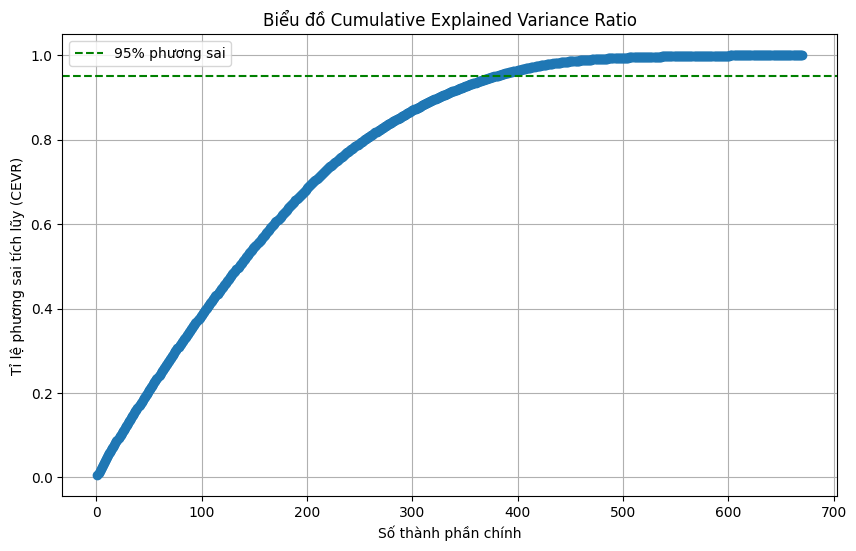

Số chiều tối thiểu giữ ≥ 95% phương sai: 379
Shape dữ liệu sau PCA: (1004, 379)


In [109]:
X_np = X_pca
pca_full = MyPCA(n_components=X_np.shape[1])
pca_full.fit(X_np)

# Vẽ biểu đồ CEVR
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca_full.CEVR)+1), pca_full.CEVR, marker='o')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% phương sai')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai tích lũy (CEVR)')
plt.title('Biểu đồ Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

# Tìm số chiều tối ưu
optimal_dims_95 = np.argmax(pca_full.CEVR >= 0.95) + 1
print(f"Số chiều tối thiểu giữ ≥ 95% phương sai: {optimal_dims_95}")

# Giảm chiều dữ liệu với số chiều tối ưu
pca = MyPCA(n_components=optimal_dims_95)
pca.fit(X_np)
X_pca = pca.transform(X_np)

print("Shape dữ liệu sau PCA:", X_pca.shape)

## Phân cụm


### Các thuật toán
Sử dụng các thuật toán: Kmeans, GMM, DBSCAN

#### ***Thuật toán Kmeans***

In [110]:
# Khởi tạo các centers ban đầu
def k_means_init_centers(X, k, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    n_samples, n_features = X.shape
    centers = np.zeros((k, n_features))
    first_center_idx = np.random.choice(n_samples)
    centers[0] = X[first_center_idx]
    distances_sq = cdist(X, centers[0].reshape(1, -1)).flatten() ** 2
    for i in range(1, k):
        probs = distances_sq / np.sum(distances_sq)
        next_center_idx = np.random.choice(n_samples, p=probs)
        centers[i] = X[next_center_idx]
        new_distances = cdist(X, centers[i].reshape(1, -1)).flatten() ** 2
        distances_sq = np.minimum(distances_sq, new_distances)
    return centers

# Gán nhãn mới cho các điểm dữ liệu khi biết centers
def kmeans_assign_labels(X, centers):
  #Tính khoảng cách theo từng cặp dữ liệu xi và mj
  D = cdist(X, centers)
  #Trả về vị trí của các center gần nhất
  return np.argmin(D, axis = 1)

# Cập nhật các centers mới dựa trên các điểm dữ liệu vừa mới thêm vào nhóm
def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    #Lấy tất cả các điểm dữ liệu X thuộc nhóm thứ k
    X_k = X[labels == k, :]
    #Tính center của nhóm k là trung bình của các dữ liệu trong nhóm k
    centers[k, :] = np.mean(X_k, axis = 0)
  return centers

#Kiểm tra điều kiện dừng của thuật toán: Nếu các centers trước và sau như nhau thì dừng lại
def has_converged(centers, new_centers):
  return np.array_equal(centers, new_centers)

#Hàm KMeans
def kmeans(X, K, random_state = None):
  centers = [k_means_init_centers(X, K, random_state)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it = it + 1
  return (centers, labels, it)

### Huấn luyện mô hình

#### ***KMeans***

In [113]:
def kmeans_multiple_runs(X, K, n_init=10):
    best_inertia = float('inf')
    best_result = None

    for seed in range(n_init):
        centers, labels, it = kmeans(X, K, random_state=seed)

        # Tính inertia (tổng bình phương khoảng cách từ điểm đến tâm cụm)
        inertia = np.sum((X - centers[-1][labels[-1]])**2)
        if inertia < best_inertia:
            best_inertia = inertia
            best_result = (centers, labels, it)

    print(f"Best inertia after {n_init} runs: {best_inertia}")
    return best_result


In [114]:
#Hiển thị dữ liệu trên đồ thị
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]

    plt.scatter(X0[:, 0], X0[:, 1], c='red', marker='^', s=20, alpha=0.8, edgecolors='k', label='Cluster 0')
    plt.scatter(X1[:, 0], X1[:, 1], c='green', marker='o', s=20, alpha=0.8, edgecolors='k', label='Cluster 1')

    plt.axis('equal')
    plt.legend()
    plt.show()

Best inertia after 50 runs: 637080.2856481529


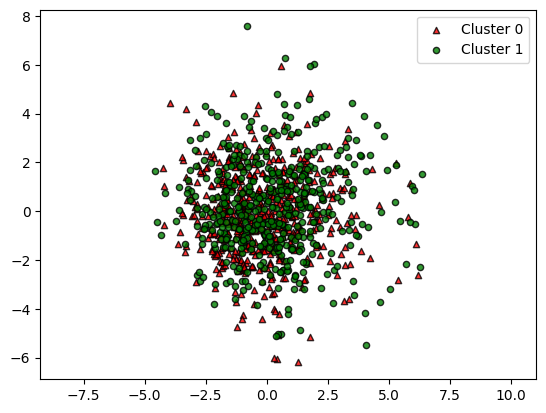

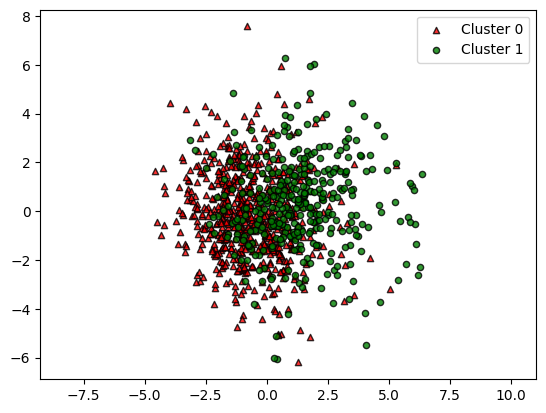

In [ ]:
X_PCA = X_pca
(centers, labels, it) = kmeans_multiple_runs(X_PCA, 2, 50)
kmeans_display(X_PCA, Y)
kmeans_display(X_PCA, labels[-1])

## Đánh giá mô hình

### Tính accurancy, precision, recall, F1-score

In [119]:
def evaluate_clustering_metrics(y_true, y_pred):
    TP = sum((y_true[i] == 1 and y_pred[i] == 1) for i in range(len(y_true)))
    TN = sum((y_true[i] == 0 and y_pred[i] == 0) for i in range(len(y_true)))
    FP = sum((y_true[i] == 0 and y_pred[i] == 1) for i in range(len(y_true)))
    FN = sum((y_true[i] == 1 and y_pred[i] == 0) for i in range(len(y_true)))

    total = len(y_true)
    accuracy = (TP + TN) / total if total > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1


#### KMeans

In [130]:
acc, prec, rec, f1 = evaluate_clustering_metrics(Y, labels[-1])
print("Acc:", acc)
print("Prec:", prec)
print("Rec:", rec)
print("F1:", f1)

Acc: 0.545816733067729
Prec: 0.509915014164306
Rec: 0.38876889848812096
F1: 0.44117647058823534
